<a href="https://colab.research.google.com/github/Victoriambaka/INDEPENDENT-PROJECT-14/blob/main/INDEPENDENT_PROJECT_WEEK_14_Part_1_K_NEAREST_NEIGHBOUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 14 PART 2: K-Nearest Neighbours (KNN) CLASSIFIER

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Classification of passengers according to survival.



### b) Defining the Metric for Success
- Being able to have a model that classifies satisfies this question

### c) Understanding the context
- Classification problem 

### d) Recording the Experimental Design

## 2. Reading the Data

In [187]:
import pandas as pd

# Loading the Data from the source i.e. csv
# ---
# Dataset source = http://bit.ly/WineQualityDatasetSource
# ---
#
test = pd.read_csv('/content/test (1).csv')
train = pd.read_csv('/content/train (5).csv')



## 3. Checking the Data

In [188]:
# Determining the no. of records in our dataset
#
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [189]:
# Previewing the top of our dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [191]:
# Previewing the bottom of our dataset
# 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [192]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [193]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [194]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4. Tidying the Dataset

In [195]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [196]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [197]:
train['Embarked'] = train['Embarked'].replace(["S"], 1)
train["Embarked"] = train['Embarked'].replace(["C"], 2)  
train["Embarked"] = train['Embarked'].replace(["Q"], 3)  


In [198]:
# Encoding string data
train["Sex"] = train['Sex'].replace(["male"], 1)  
train["Sex"] = train['Sex'].replace(["female"], 2)  


In [199]:
test['Embarked'] = test['Embarked'].replace(["S"], 1)
test["Embarked"] = test['Embarked'].replace(["C"], 2)  
test["Embarked"] = test['Embarked'].replace(["Q"], 3)  


In [200]:
# Encoding string data
test["Sex"] = test['Sex'].replace(["male"], 1)  
test["Sex"] = test['Sex'].replace(["female"], 2)  


In [201]:
# Checking for Anomalies
#
train.duplicated().sum()

0

In [202]:
test.duplicated().sum()

0

In [203]:
# Identifying the Missing Data
#
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [204]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [205]:
train.drop(["Cabin","Name","Ticket","PassengerId"], axis = 1, inplace = True) 
train['Age'] = train['Age'].fillna((train['Age'].mean), inplace=True)
train['Embarked']= train['Embarked'].fillna(3)

In [207]:
test.drop(["Cabin"], axis = 1, inplace = True) 
test['Age'] = test['Age'].fillna((test['Age'].mean), inplace=True)

KeyError: ignored

## 5. Exploratory Analysis

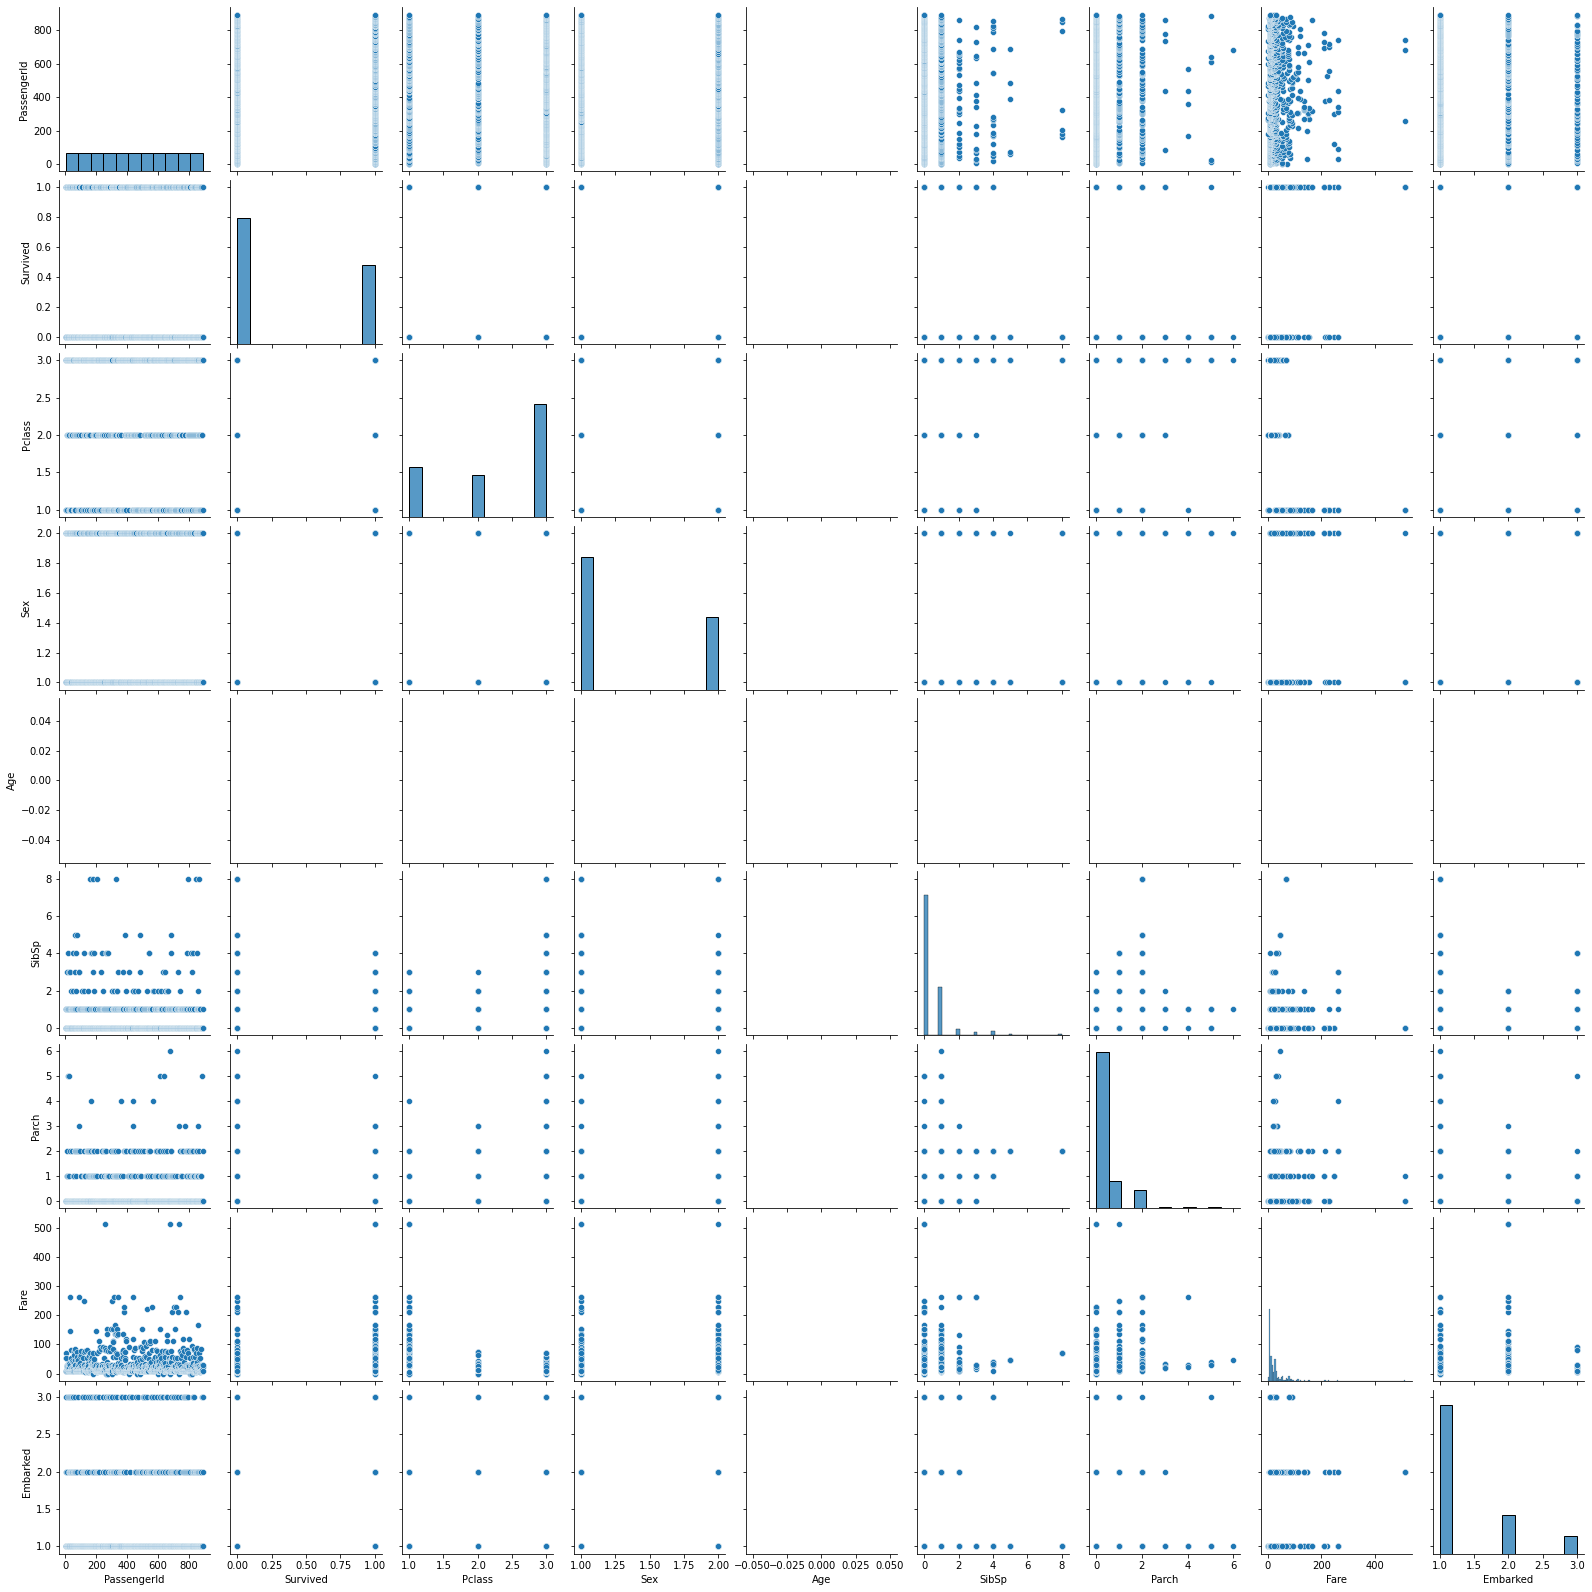

In [140]:
# Ploting the bivariate summaries and recording our observations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(train)
plt.show()

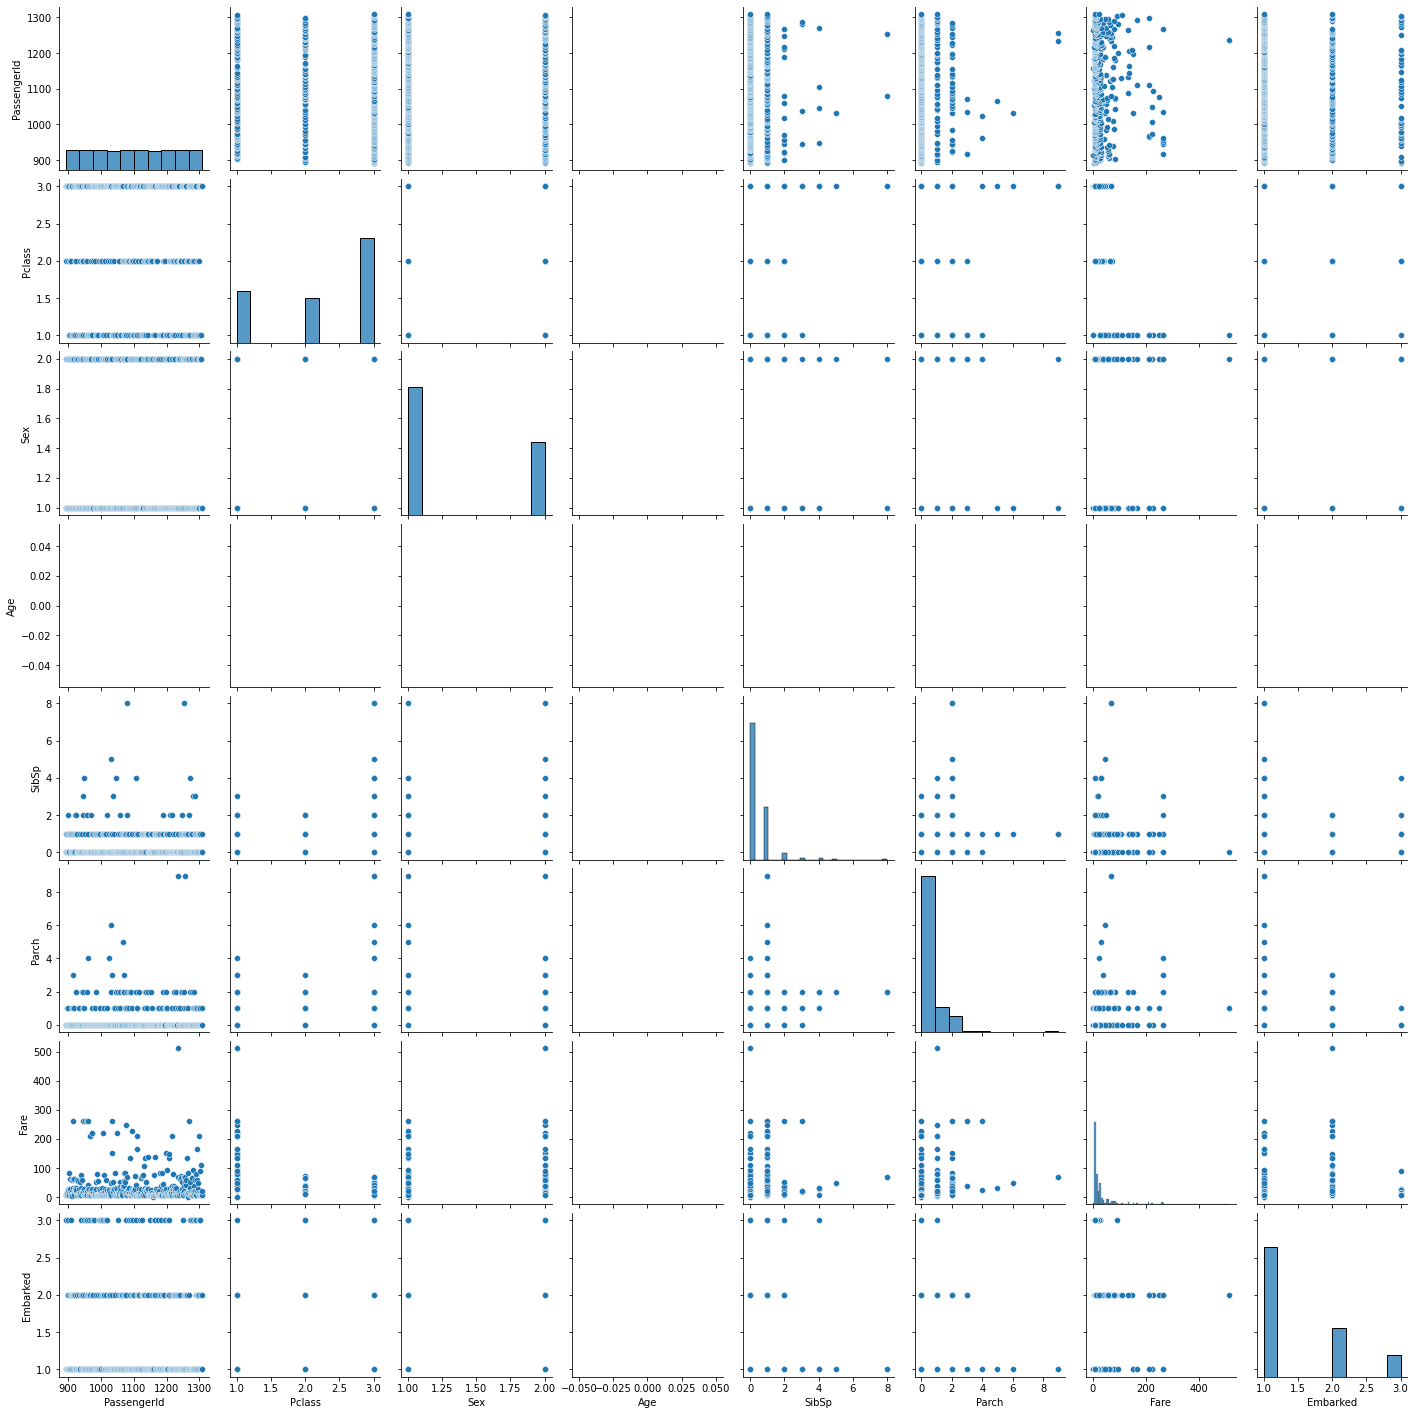

In [141]:
sns.pairplot(test)
plt.show()

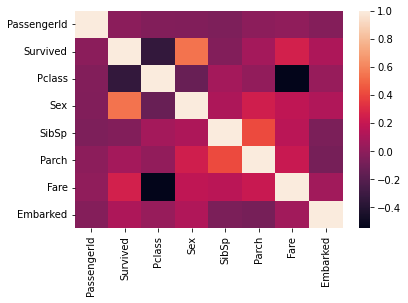

In [142]:
sns.heatmap(train.corr())
plt.show()

In [143]:
# It can be noted that the age and fare are positively correlated to survival in the train set.

Data Reduction: PCA

In [208]:
# Preprocessing
# 
X = train.drop('Survived', 1)
y = train['Survived']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [209]:
# Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [210]:
# Normalization
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [211]:
# Applying PCA
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

ValueError: ignored

In [212]:
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

explained_variance

AttributeError: ignored

In [ ]:
# Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

In [ ]:
# Results with 2 Principal Components
#
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Here the number of components for PCA has been set to 2. 

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

## 6. Implementing the Solution

In [145]:
# Then loading our libraries
# 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [146]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [155]:
# Splitting our data
# ---
# 
X = train[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].values
y = train['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [157]:
# Training our algorithm
# ---
# 
clf = KNeighborsRegressor(11)
clf.fit(X_train, y_train)

ValueError: ignored

In [158]:
# Making our prediction
# ---
# 
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

NotFittedError: ignored

## 7. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

In [160]:
# Splitting our data
# ---
# 
X = train[['Sex', 'Age', 'Fare', 'Embarked']].values
y = train['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [161]:
# Training our algorithm
# ---
# 
clf = KNeighborsRegressor(11)
clf.fit(X_train, y_train)

ValueError: ignored

In [162]:
# Making our prediction
# ---
# 
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

NotFittedError: ignored

## 8. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?
- Yes

### b). Do we need other data to answer our question? 
- No

### c). Did we have the right question?
- Yes